# Czynniki wpływające na wynik APGAR
## W tym notebooku przeanalizujemy zbiór urodzeń dzieci w USA z 2020 i postaramy się wywnioskować co i w jaki sposób wpływa na końcowy wynik APGAR
### Zaczniemy od instalacji odpowiednich bibliotek

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

### Zaimportujmy wszystkie używane biblioteki

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Wczytajmy teraz dane i sprawdźmy jak się prezentują

In [3]:
df = pd.read_csv('../natality_dataset.csv')
df.head()

,Mothers Single Years of Age,Mothers Age Recode 9,Cigarettes Before Pregnancy,Cigarettes 1st Trimester,Cigarettes 2nd Trimester,Cigarettes 3rd Trimester,Body Mass Index,Body Mass Index Recode,No Risk Factors Reported,No Infections Reported,No Characteristics of Labor Reported,Five Minute APGAR Score,Five Minute APGAR Recode
0,25,4,0,0,0,0,26.5,3,1,1,0,8,3
1,28,4,0,0,0,0,24.0,2,0,1,0,10,4
2,36,6,0,0,0,0,31.6,4,1,1,0,9,4
3,32,5,0,0,0,0,24.0,2,1,1,0,9,4
4,39,6,0,0,0,0,23.8,2,0,0,1,9,4


In [4]:
df.shape

(100000, 13)

In [5]:
df.columns

Index(['Mothers Single Years of Age', 'Mothers Age Recode 9',
       'Cigarettes Before Pregnancy', 'Cigarettes 1st Trimester',
       'Cigarettes 2nd Trimester', 'Cigarettes 3rd Trimester',
       'Body Mass Index', 'Body Mass Index Recode', 'No Risk Factors Reported',
       'No Infections Reported', 'No Characteristics of Labor Reported',
       'Five Minute APGAR Score', 'Five Minute APGAR Recode'],
      dtype='object')

Pozbędziemy się teraz wszystkich wartości nieokreślonych

In [6]:
df = df[df['Cigarettes Before Pregnancy'] != 99]
df = df[df['Cigarettes 1st Trimester'] != 99]
df = df[df['Cigarettes 2nd Trimester'] != 99]
df = df[df['Cigarettes 3rd Trimester'] != 99]
df = df[df['Body Mass Index'] != 99.9]
df = df[df['No Risk Factors Reported'] != 9]
df = df[df['No Infections Reported'] != 9]
df = df[df['Five Minute APGAR Score'] != 99]
df = df[df['Five Minute APGAR Recode'] != 5]
df.shape

(96932, 13)

### EDA
Przeanalizujmy z jakim zestawem danych przyszło nam pracować

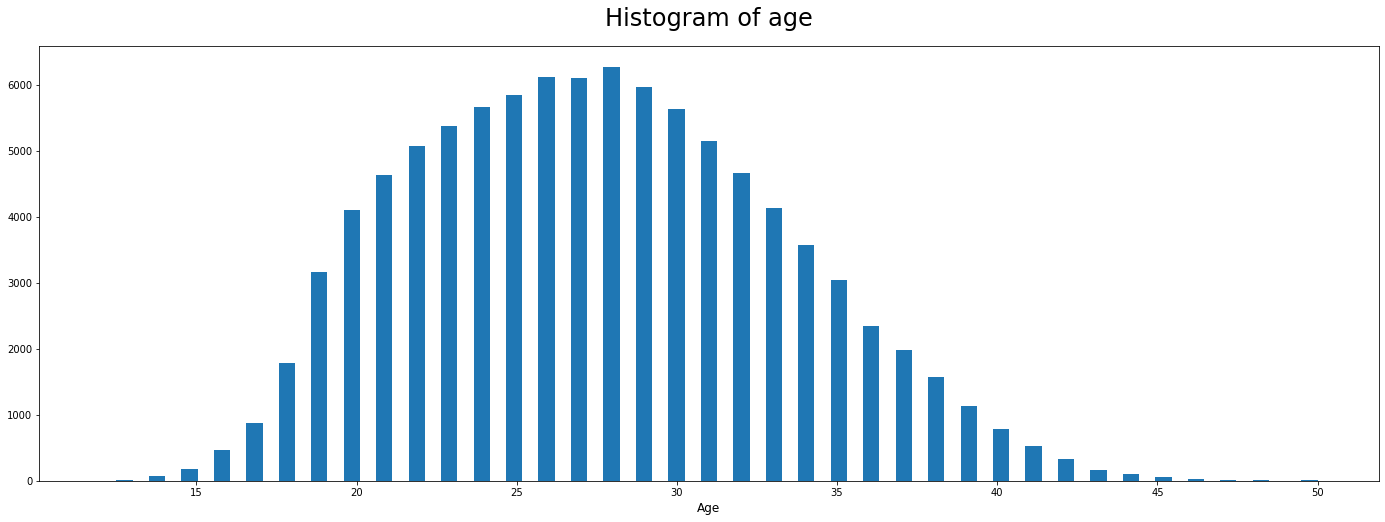

In [7]:
plt.figure(figsize=(24, 8))
plt.title("Histogram of age", fontsize=24, pad=20)
plt.xlabel('Age', fontsize=12)
plt.hist(df['Mothers Single Years of Age'], bins=75)
plt.show()

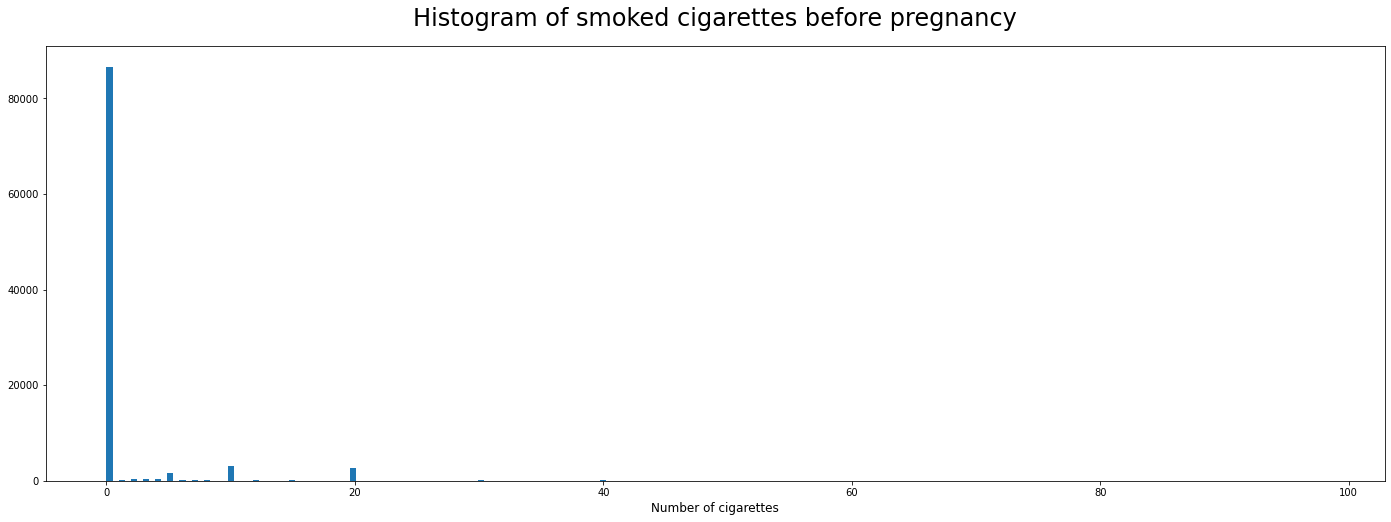

In [8]:
plt.figure(figsize=(24, 8))
plt.title("Histogram of smoked cigarettes before pregnancy", fontsize=24, pad=20)
plt.xlabel('Number of cigarettes', fontsize=12)
plt.hist(df['Cigarettes Before Pregnancy'], bins=200)
plt.show()

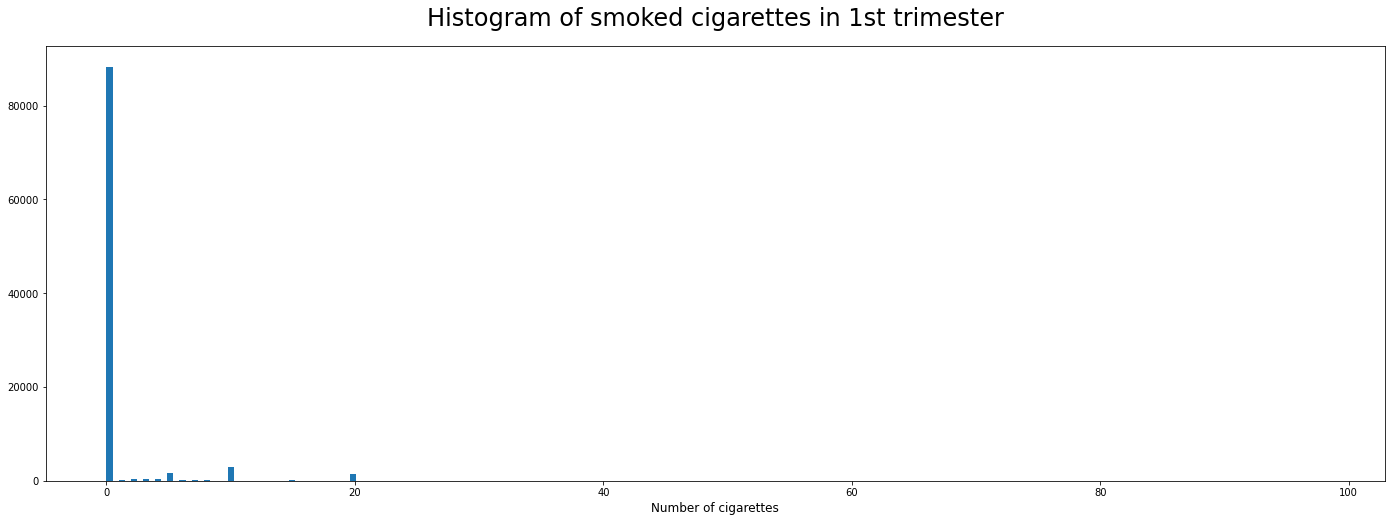

In [9]:
plt.figure(figsize=(24, 8))
plt.title("Histogram of smoked cigarettes in 1st trimester", fontsize=24, pad=20)
plt.xlabel('Number of cigarettes', fontsize=12)
plt.hist(df['Cigarettes 1st Trimester'], bins=200)
plt.show()

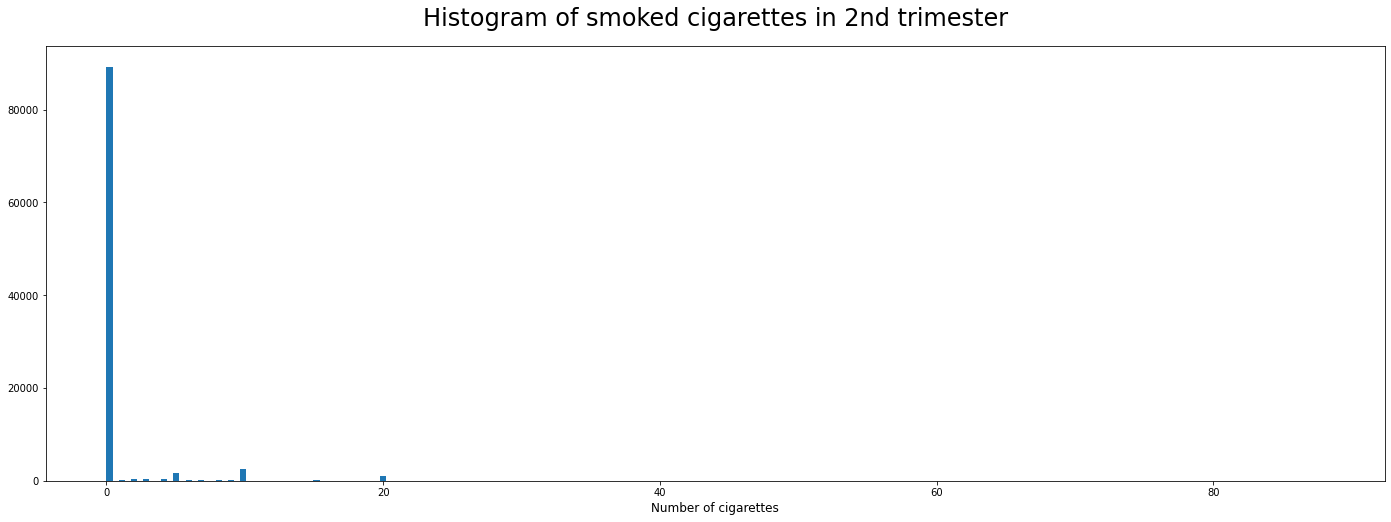

In [10]:
plt.figure(figsize=(24, 8))
plt.title("Histogram of smoked cigarettes in 2nd trimester", fontsize=24, pad=20)
plt.xlabel('Number of cigarettes', fontsize=12)
plt.hist(df['Cigarettes 2nd Trimester'], bins=200)
plt.show()

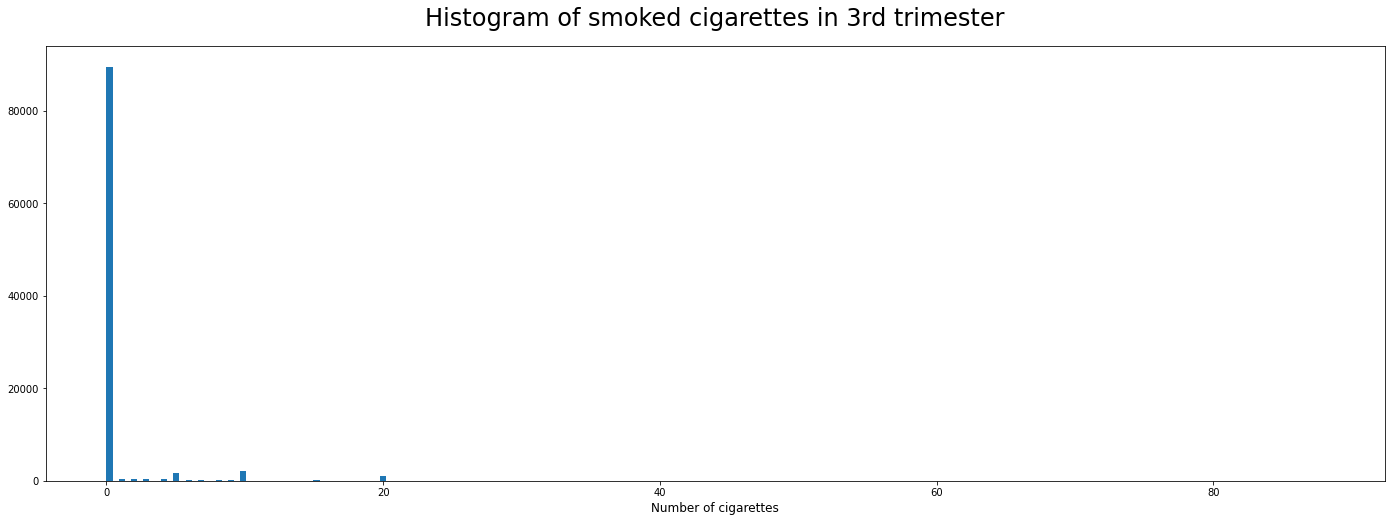

In [11]:
plt.figure(figsize=(24, 8))
plt.title("Histogram of smoked cigarettes in 3rd trimester", fontsize=24, pad=20)
plt.xlabel('Number of cigarettes', fontsize=12)
plt.hist(df['Cigarettes 3rd Trimester'], bins=200)
plt.show()

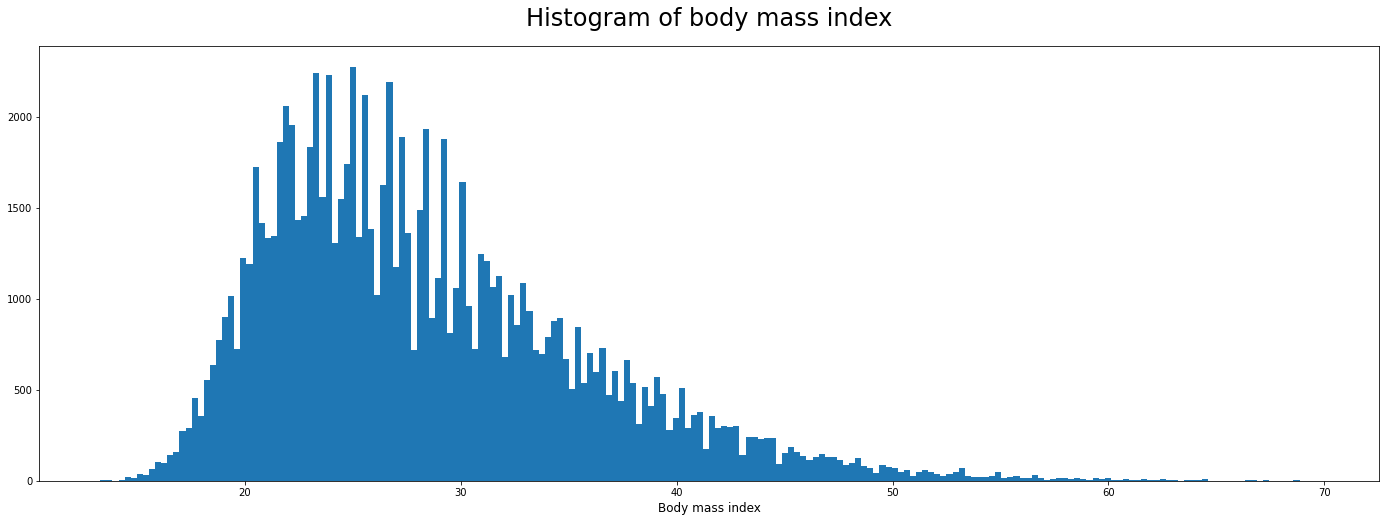

In [12]:
plt.figure(figsize=(24, 8))
plt.title("Histogram of body mass index", fontsize=24, pad=20)
plt.xlabel('Body mass index', fontsize=12)
plt.hist(df['Body Mass Index'], bins=200)
plt.show()

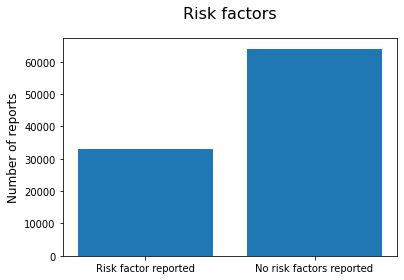

In [43]:
plt.title("Risk factors", fontsize=16, pad=20)
plt.bar(['Risk factor reported', 'No risk factors reported'], sorted(df['No Risk Factors Reported'].value_counts()))
plt.ylabel("Number of reports", fontsize=12)
plt.show()

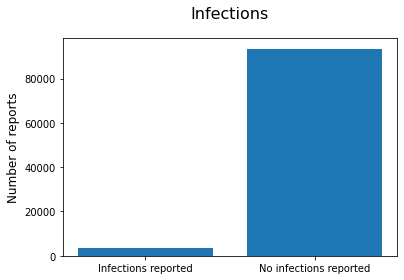

In [41]:
plt.title("Infections", fontsize=16, pad=20)
plt.bar(['Infections reported', 'No infections reported'], sorted(df['No Infections Reported'].value_counts()))
plt.ylabel("Number of reports", fontsize=12)
plt.show()